In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'Brandon': [4,2,5,2,3],
    'Emily': [1,5,2,3,2],
    'Cleo': [2,2,5,4,4],
    'Rusty': [2,5,1,4,5],
    'Samantha': [2,5,1,1,1]
})

In [3]:
df.index = ['Pale Lager', 'Hefeweizen', 'IPA', 'Irish Red Ale', 'Porter']

In [4]:
df.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Pale Lager,4,1,2,2,2
Hefeweizen,2,5,2,5,5
IPA,5,2,5,1,1
Irish Red Ale,2,3,4,4,1
Porter,3,2,4,5,1


In [5]:
dft = df.transpose()
dft

,Pale Lager,Hefeweizen,IPA,Irish Red Ale,Porter
Brandon,4,2,5,2,3
Emily,1,5,2,3,2
Cleo,2,2,5,4,4
Rusty,2,5,1,4,5
Samantha,2,5,1,1,1


In [16]:
def ratings_scatter (df, col_1, col_2):
    x = df[col_1] #assigning values of col_1 to x 
    y = df[col_2]
    names = df.index
    
    
    fig, ax = plt.subplots()
    ax.scatter(x, y, s = 0) #shaper size, how big dots are, it influences the size of the dots s = 0
    
    fig.set_figwidth(12) #inches
    fig.set_figheight(8)
    
    plt.title(col_1 + " vs. " + col_2, fontsize = 20)
    ax.set_xlabel(col_1, fontsize = 16)
    ax.set_ylabel(col_2, fontsize = 16)
    
    for i, txt in enumerate(names): #loop thru names, gets index and the value
        ax.annotate(txt, (x[i], y[i]), fontsize = 12) # getting the output (name), the x and y are the position based on i, 

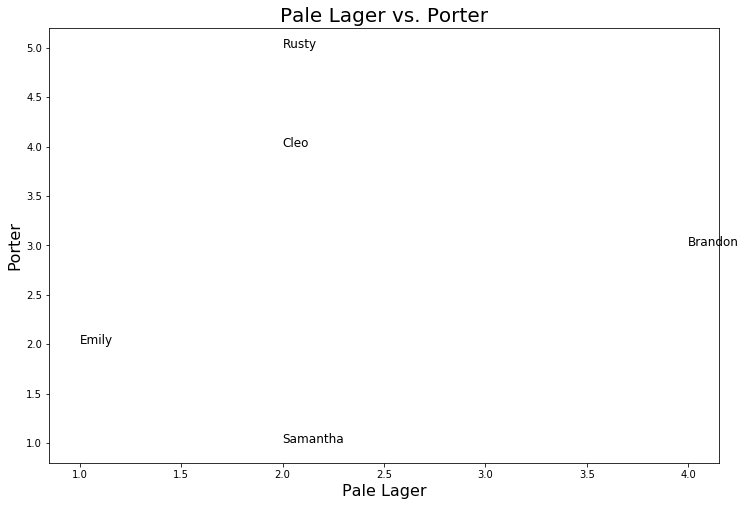

In [17]:
ratings_scatter(dft, 'Pale Lager', 'Porter')

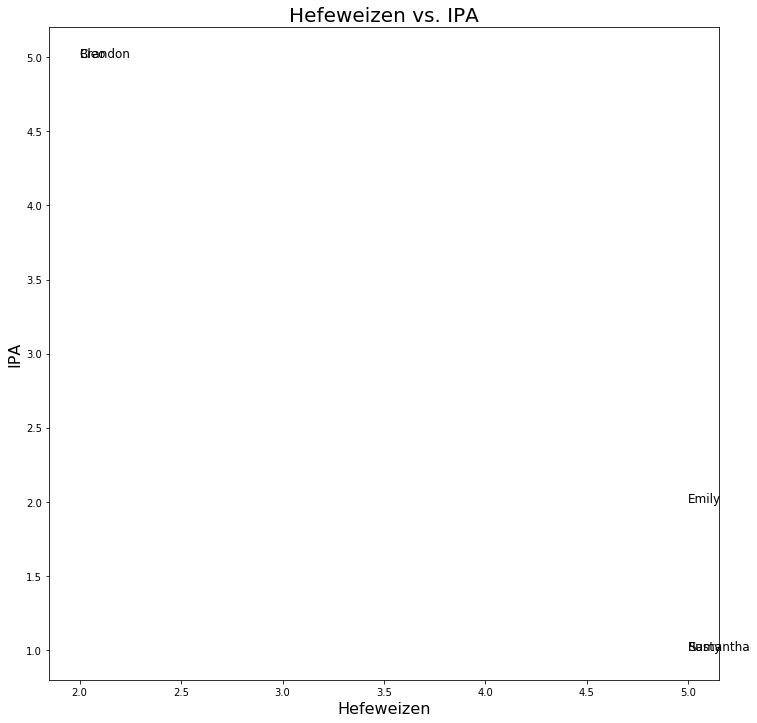

In [15]:
ratings_scatter(dft, 'Hefeweizen', 'IPA')

# pdist()
- used to measure pairwise distances between observations in n-dimensional space
- takes as arg an m-by-n array of m original observations in n-dimensional space
- returns an array of lenght for every combination
- By default, uses Euclidean geometry to measure distance (metric = 'euclidean')
- In the context of a dataframe:
m = rows
n = columns

In [18]:
from scipy.spatial.distance import pdist, squareform

In [19]:
#two dimmensional example

arr =  pd.DataFrame([(0,1), (0, 2), (1, 2)])

arr.columns = ['x', 'y']

arr

,x,y
0,0,1
1,0,2
2,1,2


In [20]:
pdist(arr)

#provides distance between rows 0 and 1
#provides distance between rows 0 and 2
#provides distance between rows 1 and 2

array([1.        , 1.41421356, 1.        ])

In [21]:
pdist(dft)

# we will have abetter idea of the distance in between the values

array([5.38516481, 3.        , 6.08276253, 5.83095189, 4.89897949,
       3.46410162, 2.64575131, 5.09901951, 6.55743852, 5.        ])

# squareform()

In [22]:
sqform = pd.DataFrame( squareform(pdist(dft)) )
sqform

,0,1,2,3,4
0,0.000000,5.385165,3.000000,6.082763,5.830952
1,5.385165,0.000000,4.898979,3.464102,2.645751
2,3.000000,4.898979,0.000000,5.099020,6.557439
3,6.082763,3.464102,5.099020,0.000000,5.000000
4,5.830952,2.645751,6.557439,5.000000,0.000000


In [25]:
sqform.columns = sqform.index = dft.index
sqform

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,0.000000,5.385165,3.000000,6.082763,5.830952
Emily,5.385165,0.000000,4.898979,3.464102,2.645751
Cleo,3.000000,4.898979,0.000000,5.099020,6.557439
Rusty,6.082763,3.464102,5.099020,0.000000,5.000000
Samantha,5.830952,2.645751,6.557439,5.000000,0.000000


In [23]:
#let's normalize and invert our scores so our numbers show the % of each similarity

In [26]:
1 / (1 + sqform)

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.156613,0.250000,0.141188,0.146392
Emily,0.156613,1.000000,0.169521,0.224009,0.274292
Cleo,0.250000,0.169521,1.000000,0.163961,0.132320
Rusty,0.141188,0.224009,0.163961,1.000000,0.166667
Samantha,0.146392,0.274292,0.132320,0.166667,1.000000


# Find recommendations for a user

In [27]:
# lets convert the previous step into a function

In [29]:
df.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Pale Lager,4,1,2,2,2
Hefeweizen,2,5,2,5,5
IPA,5,2,5,1,1
Irish Red Ale,2,3,4,4,1
Porter,3,2,4,5,1


In [32]:
def simmiliraty_matrix(x): 
    distances = pd.DataFrame(1/(1 + squareform(pdist(x.transpose()))), 
                         index=x.columns, columns=x.columns) 
    return distances

In [33]:
simmiliraty_matrix(df)

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.156613,0.250000,0.141188,0.146392
Emily,0.156613,1.000000,0.169521,0.224009,0.274292
Cleo,0.250000,0.169521,1.000000,0.163961,0.132320
Rusty,0.141188,0.224009,0.163961,1.000000,0.166667
Samantha,0.146392,0.274292,0.132320,0.166667,1.000000


In [34]:
similiarities = simmiliraty_matrix(df)

In [37]:
similiarities['Brandon'].sort_values(ascending = False)

Brandon     1.000000
Cleo        0.250000
Emily       0.156613
Samantha    0.146392
Rusty       0.141188
Name: Brandon, dtype: float64

In [38]:
#let's recommend new beers for Brandon based on the other users review

In [39]:
new = pd.DataFrame({
    'Emily': [4,2,3,5,1],
    'Cleo': [1,3,5,4,4],
    'Rusty': [2,4,4,3,5],
    'Samantha': [5,4,5,2,2]
})
new.index = ['Blonde Ale', 'Pale Ale', 'Amber Ale', 'Brown Ale', 'Stout']
new

,Emily,Cleo,Rusty,Samantha
Blonde Ale,4,1,2,5
Pale Ale,2,3,4,4
Amber Ale,3,5,4,5
Brown Ale,5,4,3,2
Stout,1,4,5,2


weight each score according to the user's similarity to Brandon:

In [40]:
brandon_weights = (similiarities[['Brandon']]
                  .transpose()
                  .drop(columns = 'Brandon')
                  )
brandon_weights

,Emily,Cleo,Rusty,Samantha
Brandon,0.156613,0.25,0.141188,0.146392


In [43]:
brandon_weights['Emily'].values

array([0.15661303])

In [42]:
new['Emily'] * brandon_weights['Emily'].values # !?!

Blonde Ale    0.626452
Pale Ale      0.313226
Amber Ale     0.469839
Brown Ale     0.783065
Stout         0.156613
Name: Emily, dtype: float64

In [45]:
recommendations = pd.DataFrame() #empty dataframe

for name in brandon_weights:
    recommendations[name] = new[name] * brandon_weights[name].values
    
recommendations

,Emily,Cleo,Rusty,Samantha
Blonde Ale,0.626452,0.25,0.282376,0.731962
Pale Ale,0.313226,0.75,0.564751,0.585570
Amber Ale,0.469839,1.25,0.564751,0.731962
Brown Ale,0.783065,1.00,0.423564,0.292785
Stout,0.156613,1.00,0.705939,0.292785


sum row-wise and sort to show the brandon's top recommendations

In [47]:
recommendations['Total'] = recommendations.sum(axis = 1) #axis = 1 , sum thru row


In [48]:
recommendations.sort_values('Total', ascending=False)

,Emily,Cleo,Rusty,Samantha,Total
Amber Ale,0.469839,1.25,0.564751,0.731962,6.033106
Brown Ale,0.783065,1.00,0.423564,0.292785,4.998827
Pale Ale,0.313226,0.75,0.564751,0.585570,4.427095
Stout,0.156613,1.00,0.705939,0.292785,4.310674
Blonde Ale,0.626452,0.25,0.282376,0.731962,3.781580
